In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("..")

In [3]:
from data import DataModule

In [5]:
ROOTDIR = "/homes/l17vedre/Bureau/Sanssauvegarde/patnum_data/train"

In [6]:
dm = DataModule(
        ROOTDIR,
        target_resolution=(1.5, 1.5, 8.),
        target_shape=None,
        class_indexes=[1, 2],
        patch_size=(256,256,26),
        train_batch_size=2,
        val_batch_size=2,
        num_workers=4
    )

dm.setup()

In [7]:
print(len(dm.train_dataloader()))

3


In [8]:
print(len(dm.val_dataloader()))

1


In [11]:
for batch in dm.val_dataloader():
    print('test')

test


In [12]:
images, masks = next(iter(dm.train_dataloader()))

In [13]:
images, masks = batch

In [14]:
print(images.size())
print(masks.size())

torch.Size([2, 1, 26, 256, 256])
torch.Size([2, 1, 26, 256, 256])


In [15]:
def compare_2_images(image1, image2, title1='', title2='', cmap1='gray', cmap2= 'gray', colorbar=False):
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
        ax = axes.ravel()
        ax[0].set_title(title1)
        plot1 = ax[0].imshow(image1, cmap=cmap1)
        ax[1].set_title(title2)
        plot2 = ax[1].imshow(image2, cmap=cmap2)
        if colorbar:
            fig.colorbar(plot1, ax=ax[0], shrink=0.55)
            fig.colorbar(plot2, ax=ax[1], shrink=0.55)
        plt.show()

In [16]:
test_image = images[0, 0, ...].numpy()
test_mask  = masks[ 0, 0, ...].numpy()

In [17]:
print(test_image.shape)
print(test_mask.shape)
d, w, h, = test_image.shape

(26, 256, 256)
(26, 256, 256)


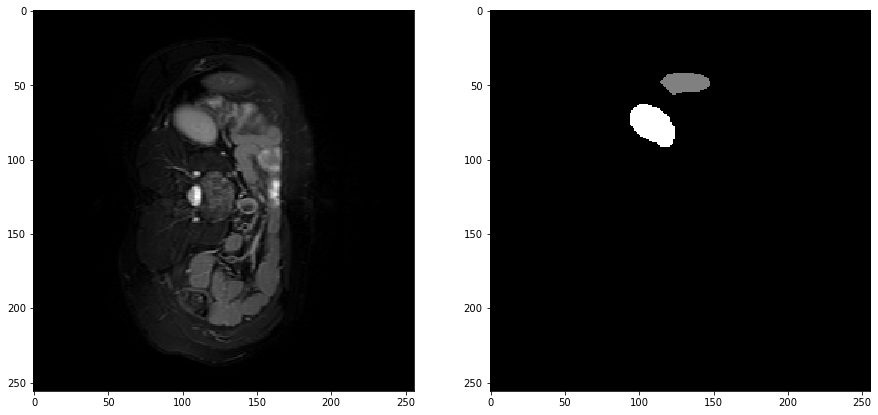

In [18]:
compare_2_images(test_image[d//2,:,:], test_mask[d//2,:,:])